<a href="https://colab.research.google.com/github/RMadhuni/Lane-detection-in-image/blob/main/CNN_road_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


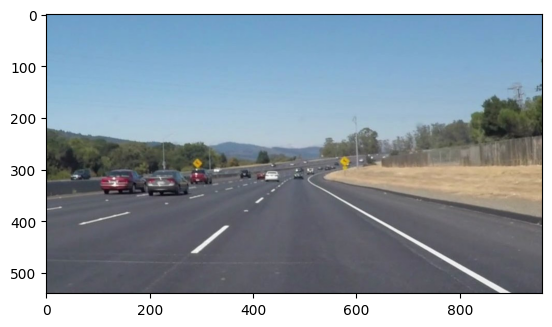

In [ ]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

#reading in an image
image = mpimg.imread('/content/solidWhiteCurve.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

Mounted at /content/drive
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


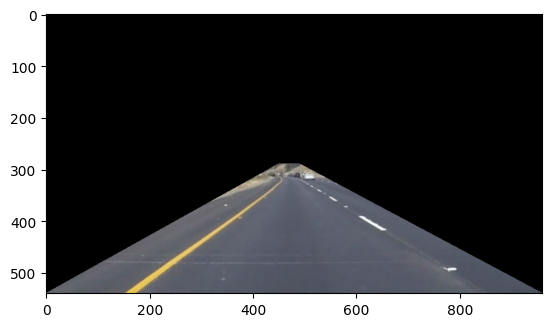

In [ ]:
# prompt: create a region of intrest and impose it on the image

from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

drive.mount('/content/drive')
#importing some useful packages
%matplotlib inline

#reading in an image
image = mpimg.imread('/content/drive/MyDrive/3(1).jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

# Define the region of interest (ROI) vertices
# These coordinates are specific to the example image and may need adjustment
vertices = np.array([[(0,image.shape[0]),(450, 290), (490, 290), (image.shape[1],image.shape[0])]], dtype=np.int32)

def region_of_interest(img, vertices):
    """
    Applies an image mask.

    Only keeps the region of the image defined by the polygon
    formed from vertices. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)

    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    #filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# Apply the region of interest mask to the image
masked_image = region_of_interest(image, vertices)

# Display the masked image
plt.imshow(masked_image)

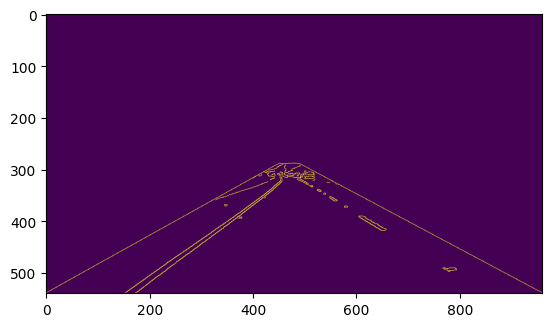

In [ ]:
gray_image = cv2.cvtColor(masked_image,cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image,100,200)
plt.imshow(cannyed_image)

In [ ]:
lines=cv2.HoughLinesP(
    cannyed_image,
    rho=6,
    theta=np.pi/60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)

In [ ]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    # If there are no lines to draw, return the original image.
    if lines is None:
        return img

    # Make a copy of the original image.
    img = np.copy(image)

    # Create a blank image with the same size as the original image.
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    # Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)

    # Merge the line image onto the original image using addWeighted for blending.
    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)

    # Return the modified image.
    return img

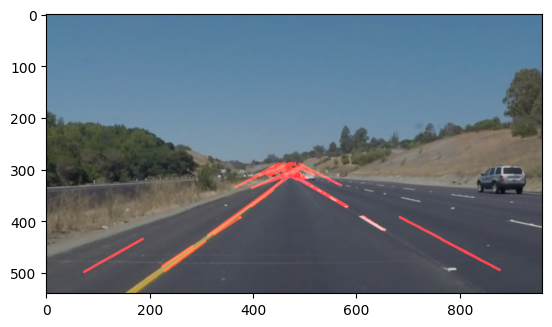

In [ ]:
line_image = draw_lines(cannyed_image, lines)
plt.imshow(line_image)

Accuracy: 0.98, Precision: 0.36, Recall: 0.14, F1-Score: 0.21


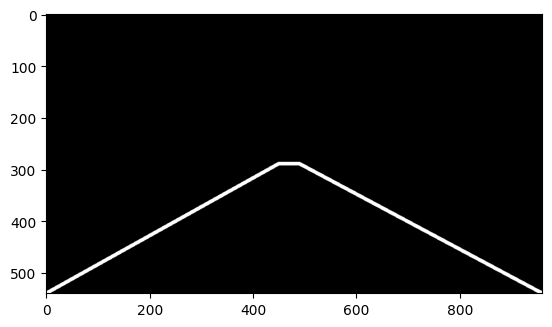

In [ ]:

# Create a ground truth mask (example: manually defined lanes)
ground_truth_mask = np.zeros_like(cannyed_image)
cv2.line(ground_truth_mask, (450, 290), (490, 290), 255, 5)
cv2.line(ground_truth_mask, (0, image.shape[0]), (450, 290), 255, 5)
cv2.line(ground_truth_mask, (490, 290), (image.shape[1], image.shape[0]), 255, 5)
plt.imshow(ground_truth_mask, cmap='gray')

# Compute Accuracy Metrics
def compute_accuracy(detected_mask, ground_truth_mask):
    TP = np.sum((detected_mask == 255) & (ground_truth_mask == 255))
    TN = np.sum((detected_mask == 0) & (ground_truth_mask == 0))
    FP = np.sum((detected_mask == 255) & (ground_truth_mask == 0))
    FN = np.sum((detected_mask == 0) & (ground_truth_mask == 255))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score

# Evaluate accuracy
accuracy, precision, recall, f1_score = compute_accuracy(cannyed_image, ground_truth_mask)
print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score:.2f}')